This notebook is used for  the capstone project to predict the fetal  the fatality of an accident based on historical data.

In [1]:
import pandas as pd
import numpy as np

In [2]:
print(' Hello Capstone Project Course!')

 Hello Capstone Project Course!


***
# 1. Import Data 


In [3]:
df = pd.read_csv('file:///Users/chendi/Documents/IBM%20data%20science/US_Accidents_June20.csv')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.shape

(3513617, 49)

In [5]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
df.dtypes

ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

***
# 2. Data Cleaning and Preparation

## 2.1  Identify Missing Data

In [7]:
missing_data = df.isnull()
missing_data

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3513613,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3513614,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3513615,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

ID
False    3513617
Name: ID, dtype: int64

Source
False    3513617
Name: Source, dtype: int64

TMC
False    2478818
True     1034799
Name: TMC, dtype: int64

Severity
False    3513617
Name: Severity, dtype: int64

Start_Time
False    3513617
Name: Start_Time, dtype: int64

End_Time
False    3513617
Name: End_Time, dtype: int64

Start_Lat
False    3513617
Name: Start_Lat, dtype: int64

Start_Lng
False    3513617
Name: Start_Lng, dtype: int64

End_Lat
True     2478818
False    1034799
Name: End_Lat, dtype: int64

End_Lng
True     2478818
False    1034799
Name: End_Lng, dtype: int64

Distance(mi)
False    3513617
Name: Distance(mi), dtype: int64

Description
False    3513616
True           1
Name: Description, dtype: int64

Number
True     2262864
False    1250753
Name: Number, dtype: int64

Street
False    3513617
Name: Street, dtype: int64

Side
False    3513617
Name: Side, dtype: int64

City
False    3513505
True         112
Name: City, dtype: int64

County
False    3513617
Name: Coun

In [9]:
df['check']= df['Sunrise_Sunset'] + df['Astronomical_Twilight'] + df['Nautical_Twilight'] + df['Civil_Twilight']
df['check'].value_counts()

DayDayDayDay            2590168
NightNightNightNight     434603
NightDayDayNight         175247
NightDayDayDay           174050
NightDayNightNight       135501
DayNightDayDay             3545
NightNightDayNight          186
NightNightDayDay            158
DayDayDayNight               35
DayNightDayNight              9
Name: check, dtype: int64

 *As shown in the table above, these four variables give same value at most of the time. As whether the natural light is enough for a driver to see clearly might be more related to the severity of a  car accident, I only keep the variable 'Civil_Twilight' to identify whether the accident happens during day or not.*

In [10]:
df.drop(columns=['check', 'Distance(mi)', 'Sunrise_Sunset', 'Astronomical_Twilight',  'Nautical_Twilight'], axis = 1, inplace = True)

In [11]:
# drop variables that contain little information about the accident but have a lot of missing values
df.drop(columns=['Source', 'Weather_Timestamp', 'TMC',  'Number','Zipcode', 'End_Lat', 'End_Lng'], axis = 1, inplace = True) 

In [12]:
# drop rows have missing value for variables that might be highly related to the severity of car accident
df.dropna(subset = ['Visibility(mi)', 'Weather_Condition', 'Description','City', 'Timezone', 'Civil_Twilight'], axis = 0, inplace = True)

In [13]:
df['Wind_Direction'].value_counts()

Calm        364941
CALM        216624
SSW         180609
South       176048
WNW         173083
SW          171409
WSW         164814
NW          163992
West        163210
SSE         162884
NNW         146174
North       137971
SE          131484
NNE         116867
NE          115128
ESE         114387
Variable    112595
ENE         112003
S           103679
East        102824
W            94873
N            70289
VAR          64312
E            59966
Name: Wind_Direction, dtype: int64

In [14]:
# check whether severity varies for different wind directions

df_gptest = df[['Wind_Direction', 'Severity']]
df_gptest.groupby(['Wind_Direction'],as_index=False).mean()

,Wind_Direction,Severity
0,CALM,2.235860
1,Calm,2.384690
2,E,2.309609
3,ENE,2.349955
4,ESE,2.353729
5,East,2.393284
6,N,2.274694
7,NE,2.341785
8,NNE,2.328801
9,NNW,2.340238


In [15]:
df.drop(columns = ['Wind_Direction'], axis =1, inplace = True)

In [16]:
df.shape

(3429500, 37)

## 2.2 Feature Selection

 1. wind direction and the car accident severity

In [17]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [18]:
!pip install statsmodels

In [19]:
# check the value of severity
pd.unique(df.Severity.values)

array([3, 2, 1, 4])

###  *2.2.1. temperature and the severity of a car accident*

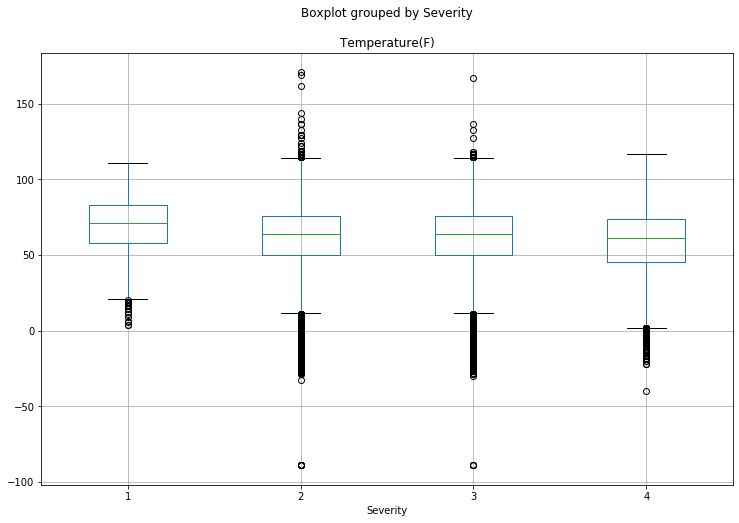

In [20]:
# box plot
df.boxplot('Temperature(F)', by='Severity', figsize=(12, 8))

*As shown in the figure above, the median temperature for less sever car accident is slightly lower and the extreme temperature is associated with more sever car accident. Therefore, I divide temperature into three categories, temperatures below zero are grouped as cold, temperatures between 0 and 110 are categorized as temperate, and temperatures above 110 are categorized as hot.*

In [21]:
# convert temperature into categorical variables to see the influence of extreme weather

bins = [min(df["Temperature(F)"]), 0, 110, max(df["Temperature(F)"])]
df['temperature'] = pd.cut(df['Temperature(F)'], bins, labels=['cold','temperate','hot'], include_lowest=True )
df.groupby(['temperature']).agg({'Severity': ['mean', 'count', min, max]})

Severity                 
                 mean    count min max
temperature                           
cold         2.408922     6456   2   4
temperate    2.338090  3411094   1   4
hot          2.242884      527   1   4

###  *2.2.2. wind chill and the severity of a car accident*

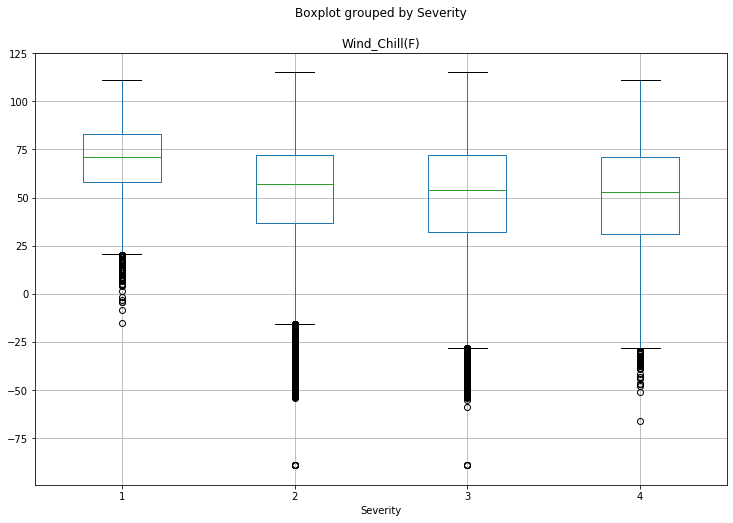

In [22]:
# box plot
df.boxplot('Wind_Chill(F)', by='Severity', figsize=(12, 8))

###  *2.2.3. humidity and the severity of a car accident*

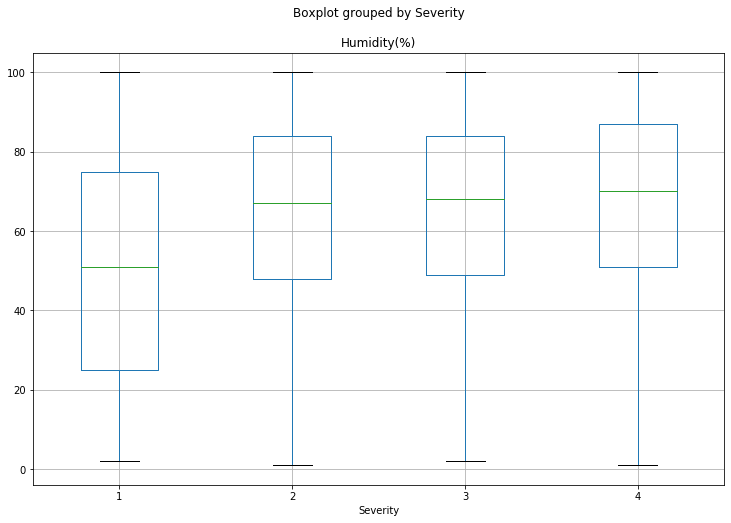

In [23]:
# box plot
df.boxplot('Humidity(%)', by='Severity', figsize=(12, 8))

###  *2.2.4. pressure and the severity of a car accident*

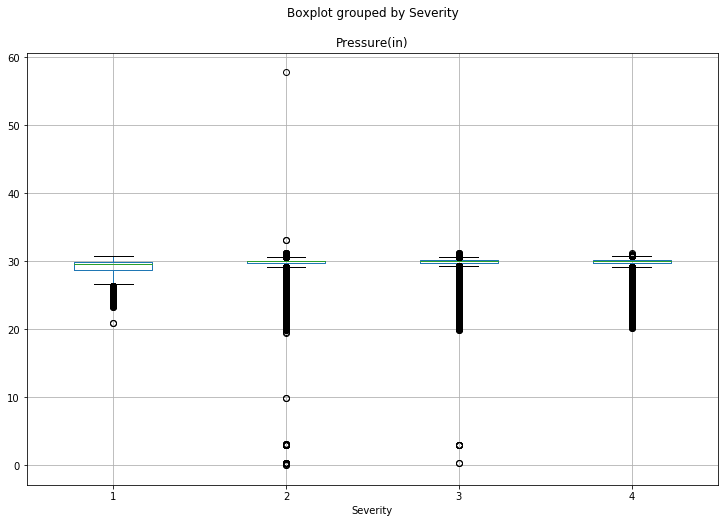

In [24]:
# box plot
df.boxplot('Pressure(in)', by='Severity', figsize=(12, 8))

###  *2.2.5. wind speed and the severity of a car accident*

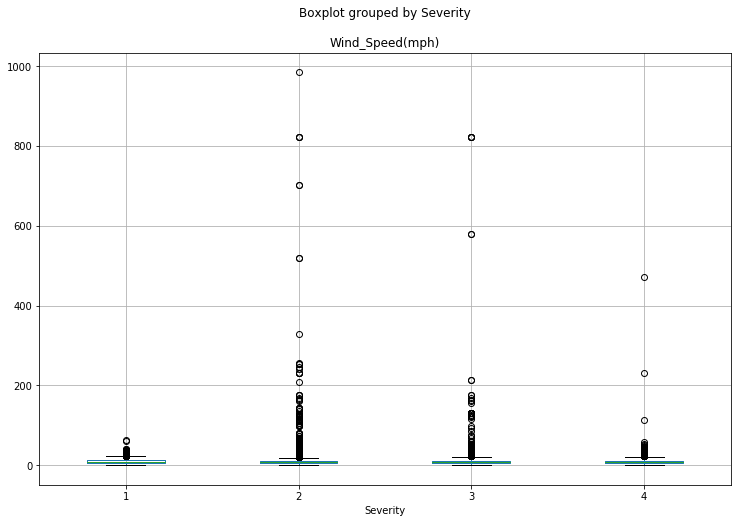

In [25]:
# box plot
df.boxplot('Wind_Speed(mph)', by='Severity', figsize=(12, 8))

In [26]:
# convert wind speed into categorical variables to see the influence of strong wind

df['strong_wind'] = (df['Wind_Speed(mph)']> 50)
df.groupby(['strong_wind']).agg({'Severity': ['mean', 'count']})

Severity         
                 mean    count
strong_wind                   
False        2.338369  3429341
True         2.364780      159

###  *2.2.6. precipitation and the severity of a car accident*

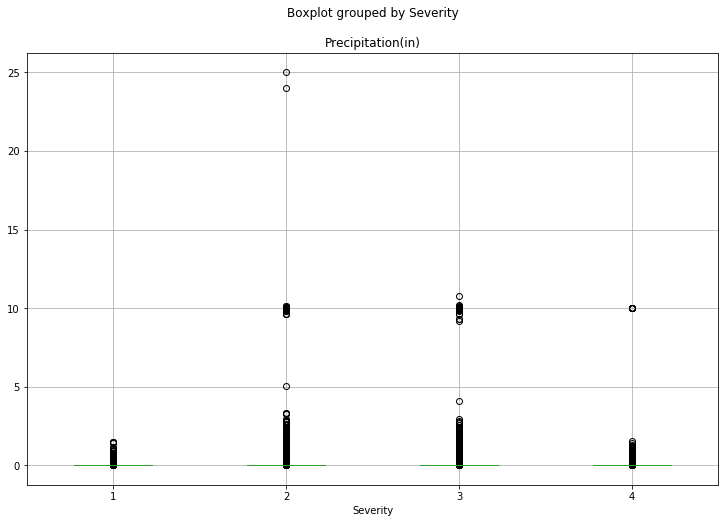

In [27]:
# box plot
df.boxplot('Precipitation(in)', by='Severity', figsize=(12, 8))

In [28]:
# convert precipitation into categorical variables to see the influence of large precipitation

df['large_Precipitation'] = (df['Precipitation(in)']> 2)
df.groupby(['large_Precipitation']).agg({'Severity': ['mean', 'count']})

Severity         
                         mean    count
large_Precipitation                   
False                2.338357  3429106
True                 2.449239      394

## 2.3 data preparation

### 2.3.1. remaining missing value

In [29]:
# for temperature, I replace the missing value with the most frequent value

df['temperature'].isnull().value_counts()

False    3418077
True       11423
Name: temperature, dtype: int64

In [30]:
df['temperature'].replace(np.nan, 'temperate', inplace = True)

In [31]:
# for humidity and wind chill, observations with missing values are dropped

df.dropna(subset = ['Wind_Chill(F)', 'Humidity(%)'], axis = 0, inplace = True)

In [32]:
df['strong_wind'].isnull().value_counts()

False    1635505
Name: strong_wind, dtype: int64

In [33]:
df['large_Precipitation'].isnull().value_counts()

False    1635505
Name: large_Precipitation, dtype: int64

### 2.3.2. correcting data format

In [34]:
import datetime
df['start_date'] = pd.to_datetime(df['Start_Time'])
df['dayofweek'] = df['start_date'].dt.dayofweek

In [35]:
df['hour'] = df['start_date'].dt.hour

In [36]:
df['temperature'].replace({'cold': -1, 'temperate': 0, 'hot': 1}, inplace = True)
df['Side'].replace({'R': 1, 'L': 0}, inplace = True)
df['Civil_Twilight'].replace({'Day': 1, 'Night': 0}, inplace = True)

In [37]:
X = df[['temperature', 'Side', 'Civil_Twilight', 'hour', 'dayofweek', 'Wind_Chill(F)', 'Humidity(%)', 'strong_wind','large_Precipitation', 'Visibility(mi)' ]]

### 2.3.3 data normalization

In [38]:
from sklearn import preprocessing

In [39]:
X = df [['temperature', 'Wind_Chill(F)', 'strong_wind', 'large_Precipitation', 'dayofweek', 'hour', 'Civil_Twilight', 'Side', 'Visibility(mi)']]
X = preprocessing.StandardScaler().fit(X).transform(X)

***
# 3.Exploratory Data Analysis 

## 3.1 Descriptive Statistical Analysis

### 3.1.1 summary statistics for continuous variables

In [40]:
df[[ 'Wind_Chill(F)', 'Visibility(mi)']].describe()

,Wind_Chill(F),Visibility(mi)
count,1.635505e+06,1.635505e+06
mean,5.361466e+01,8.965905e+00
std,2.375038e+01,2.990811e+00
min,-5.900000e+01,0.000000e+00
25%,3.580000e+01,1.000000e+01
50%,5.700000e+01,1.000000e+01
75%,7.300000e+01,1.000000e+01
max,1.150000e+02,1.300000e+02


### 3.1.2 summary statistics for categorical variables

In [41]:
df.groupby(['temperature']).agg({'Severity': ['mean', 'count']})

Severity         
                 mean    count
temperature                   
-1           2.405797     5589
 0           2.300311  1629725
 1           2.167539      191

In [42]:
df.groupby(['strong_wind']).agg({'Severity': ['mean', 'count']})

Severity         
                 mean    count
strong_wind                   
False        2.300651  1635432
True         2.397260       73

In [43]:
df.groupby(['Side']).agg({'Severity': ['mean', 'count']})

Severity         
         mean    count
Side                  
0     2.13381   303684
1     2.33870  1331821

In [44]:
df.groupby(['Civil_Twilight']).agg({'Severity': ['mean', 'count']})

Severity         
                    mean    count
Civil_Twilight                   
0               2.361844   376477
1               2.282359  1259028

In [45]:
df.groupby(['large_Precipitation']).agg({'Severity': ['mean', 'count']})

Severity         
                         mean    count
large_Precipitation                   
False                2.300648  1635401
True                 2.423077      104

### 3.1.3 summary statistics for time variables

Text(0.5, 1.0, 'mean severity and the number of car accident at each hour')

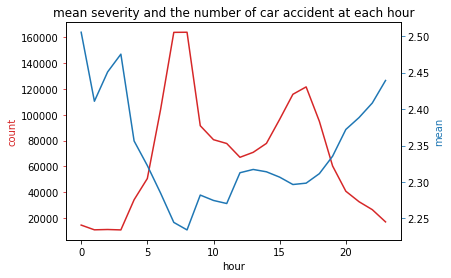

In [46]:
# severity and hour of day 

df_hour = df.groupby(['hour']).agg({'Severity': ['mean', 'count']})
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('hour')
ax1.set_ylabel('count', color=color)
ax1.plot(df_hour.index, df_hour.iloc[:,1], color=color)
ax1.tick_params(axis='y', color=color)

color = 'tab:blue'
ax2 = ax1.twinx()
ax2.set_ylabel('mean', color=color) 
ax2.plot(df_hour.index, df_hour.iloc[:,0].values, color=color)
ax2.tick_params(axis='y', color=color)

plt.title('mean severity and the number of car accident at each hour')

Text(0.5, 1.0, 'mean severity and the number of car accident at each day of week')

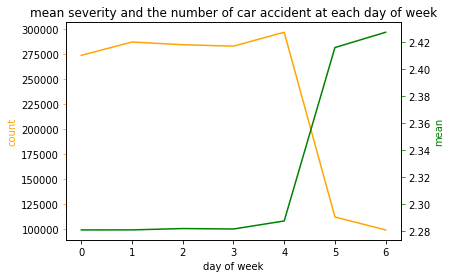

In [47]:
# severity and day of week

df_weekday = df.groupby(['dayofweek']).agg({'Severity': ['mean', 'count']})
fig, ax1 = plt.subplots()
ax1.set_xlabel('day of week')
ax1.set_ylabel('count', color= 'orange')
ax1.plot(df_weekday.index, df_weekday.iloc[:,1], color='orange')
ax1.tick_params(axis='y', color='orange')


ax2 = ax1.twinx()
ax2.set_ylabel('mean', color='green') 
ax2.plot(df_weekday.index, df_weekday.iloc[:,0].values, color='green')
ax2.tick_params(axis='y', color='green')

plt.title('mean severity and the number of car accident at each day of week')

***
# 4. Classification Model

In [75]:
df.shape

(1635505, 43)

In [124]:
df_new = df.sample(n = 30000)

In [125]:
X = df_new [['temperature', 'Wind_Chill(F)', 'strong_wind', 'large_Precipitation', 'dayofweek', 'hour', 'Civil_Twilight', 'Side', 'Visibility(mi)']]
X = preprocessing.StandardScaler().fit(X).transform(X)

In [126]:
y = df_new['Severity'].values

## 4.1 KNN

In [127]:
# We split the X into train and test to find the best k

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [136]:
# find the best k
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

Kn = 100
mean_acc = np.zeros((Kn-1))

for k in range(1, Kn):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[k-1] = metrics.accuracy_score(y_test, yhat)

array([0.58433333, 0.655     , 0.631     , 0.66866667, 0.6585    ,
       0.6785    , 0.66666667, 0.68833333, 0.68      , 0.69183333,
       0.68683333, 0.69316667, 0.691     , 0.70016667, 0.69766667,
       0.69866667, 0.696     , 0.69966667, 0.69966667, 0.70283333,
       0.70266667, 0.704     , 0.706     , 0.70666667, 0.70516667,
       0.70466667, 0.705     , 0.70483333, 0.70433333, 0.705     ,
       0.70616667, 0.70633333, 0.70683333, 0.70483333, 0.70633333,
       0.7055    , 0.70816667, 0.7075    , 0.70883333, 0.7085    ,
       0.70916667, 0.70883333, 0.709     , 0.70816667, 0.709     ,
       0.70766667, 0.708     , 0.71016667, 0.7095    , 0.709     ,
       0.70916667, 0.709     , 0.70833333, 0.70883333, 0.709     ,
       0.70933333, 0.70916667, 0.71066667, 0.7095    , 0.71      ,
       0.7095    , 0.71016667, 0.70866667, 0.70966667, 0.709     ,
       0.70916667, 0.70933333, 0.71033333, 0.71      , 0.71066667,
       0.70933333, 0.71066667, 0.70983333, 0.7095    , 0.70966

In [151]:
knn = pd.DataFrame(columns=['k', 'mean_acc'])
knn['mean_acc'] = mean_acc
knn['k']= np.arange(1, Kn)
knn.set_index('k', inplace = True)
knn.sort_values(by = ['mean_acc'], ascending = False)

,mean_acc
k,
72,0.710667
58,0.710667
70,0.710667
68,0.710333
78,0.710167
...,...
7,0.666667
5,0.658500
2,0.655000


In [152]:
# k = 58, 72 and 70 gives the highest accuracy score, we use the lowest among them

KNN_model = KNeighborsClassifier(n_neighbors=58).fit(X_train,y_train)

## 4.2 Decision Tree

In [153]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## 4.3 Support Vector Machine

In [154]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train) 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

## 4.4 Logistic Regression

In [155]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## 4.5 Model Evaluation

In [156]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [157]:
knn_yhat = KNN_model.predict(X_test)
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )

KNN Jaccard index: 0.71
KNN F1-score: 0.60


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [158]:
DT_yhat = DT_model.predict(X_test)
print("DT Jaccard index: %.2f" % jaccard_similarity_score(y_test, DT_yhat))
print("DT F1-score: %.2f" % f1_score(y_test, DT_yhat, average='weighted') )

DT Jaccard index: 0.71
DT F1-score: 0.59


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [159]:
SVM_yhat = SVM_model.predict(X_test)
print("SVM Jaccard index: %.2f" % jaccard_similarity_score(y_test, SVM_yhat))
print("SVM F1-score: %.2f" % f1_score(y_test, SVM_yhat, average='weighted') )

SVM Jaccard index: 0.71
SVM F1-score: 0.59


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [160]:
LR_yhat = LR_model.predict(X_test)
LR_yhat_prob = LR_model.predict_proba(X_test)
print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, LR_yhat))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))

LR Jaccard index: 0.71
LR F1-score: 0.59
LR LogLoss: 0.74


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [206]:
y_test = pd.Series(y_test)
knn_yhat = pd.Series(knn_yhat)
DT_yhat = pd.Series(DT_yhat)
SVM_yhat =pd.Series(SVM_yhat)
LR_yhat =pd.Series(SVM_yhat)
df_result = pd.concat([y_test, knn_yhat, DT_yhat, SVM_yhat, LR_yhat], axis = 1)
df_result.columns = ['y_test', 'knn_yhat', 'DT_yhat', 'SVM_yhat', 'LR_yhat']
df_result.apply(pd.Series.value_counts)

,y_test,knn_yhat,DT_yhat,SVM_yhat,LR_yhat
1,105,NaN,NaN,NaN,NaN
2,4256,5904.0,6000.0,5995.0,5995.0
3,1456,96.0,NaN,5.0,5.0
4,183,NaN,NaN,NaN,NaN
